In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the training and test dataframe
df_train=pd.read_csv('D:\IIT bombay\ee 769\EE assignment2-203110049\Train.csv')
df_test=pd.read_csv('D:\IIT bombay\ee 769\EE assignment2-203110049\Test.csv')

In [6]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [4]:
df_test.tail()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14845,14845,45291,1000.0,2011-03-10,Danida,1811,DANID,34.533405,-9.781788,none,0,Lake Nyasa,Ng'Alike,Iringa,11,5,Ludewa,Mlangali,45,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14846,14846,54736,0.0,2011-03-18,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,Rufiji,Magoha,Morogoro,5,3,Kilombero,Lumemo,150,True,GeoData Consultants Ltd,NaN,NaN,True,2010,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,14847,44238,0.0,2012-11-03,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,Lake Tanganyika,Simbo 2,Tabora,14,3,Uyui,Magiri,0,True,GeoData Consultants Ltd,VWC,Maguri water supply,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14848,14848,13229,0.0,2013-01-18,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,Lake Tanganyika,Maendeleo,Kigoma,16,1,Kibondo,Rugongowe,700,True,GeoData Consultants Ltd,VWC,Kichananga gravity water supply,False,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14849,14849,70800,30.0,2011-02-23,Jaica,60,JAICA,39.330407,-7.039634,Kwa Jokoo,0,Wami / Ruvu,Kwa Jokoo,Pwani,60,43,Mkuranga,Vikindu,1,True,GeoData Consultants Ltd,VWC,Vianzi Water Supply,False,2010,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [3]:
print(df_train.shape)
print(df_test.shape)


(44550, 41)
(14850, 41)


In [63]:
columns = pd.DataFrame({
    "column":df_train.columns,
    "unique values": [len(df_train[i].unique()) for i in df_train.columns],
    "types": list(df_train.dtypes)
})
print(columns.to_markdown())

|    | column                |   unique values | types   |
|---:|:----------------------|----------------:|:--------|
|  0 | id                    |           44550 | int64   |
|  1 | amount_tsh            |              85 | float64 |
|  2 | date_recorded         |             346 | object  |
|  3 | funder                |            1652 | object  |
|  4 | gps_height            |            2396 | int64   |
|  5 | installer             |            1855 | object  |
|  6 | longitude             |           43155 | float64 |
|  7 | latitude              |           43155 | float64 |
|  8 | wpt_name              |           28991 | object  |
|  9 | num_private           |              59 | int64   |
| 10 | basin                 |               9 | object  |
| 11 | subvillage            |           16618 | object  |
| 12 | region                |              21 | object  |
| 13 | region_code           |              27 | int64   |
| 14 | district_code         |              20 | int64  

In [64]:
columns = pd.DataFrame({
    "column": df_test.columns,
    "unique values": [len(df_test[i].unique()) for i in df_test.columns],
    "types": list(df_test.dtypes)
})
print(columns.to_markdown())

|    | column                |   unique values | types   |
|---:|:----------------------|----------------:|:--------|
|  0 | Unnamed: 0            |           14850 | int64   |
|  1 | id                    |           14850 | int64   |
|  2 | amount_tsh            |              74 | float64 |
|  3 | date_recorded         |             326 | object  |
|  4 | funder                |             948 | object  |
|  5 | gps_height            |            2128 | int64   |
|  6 | installer             |            1085 | object  |
|  7 | longitude             |           14390 | float64 |
|  8 | latitude              |           14390 | float64 |
|  9 | wpt_name              |           10708 | object  |
| 10 | num_private           |              38 | int64   |
| 11 | basin                 |               9 | object  |
| 12 | subvillage            |            8449 | object  |
| 13 | region                |              21 | object  |
| 14 | region_code           |              26 | int64  

## Data visualization


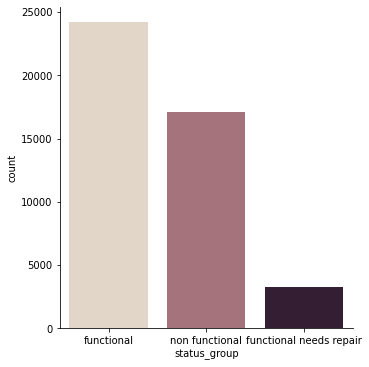

In [9]:
#visualizating dependent feature of training set
sns.catplot(x="status_group", kind="count", palette="ch:.25", data=df_train)

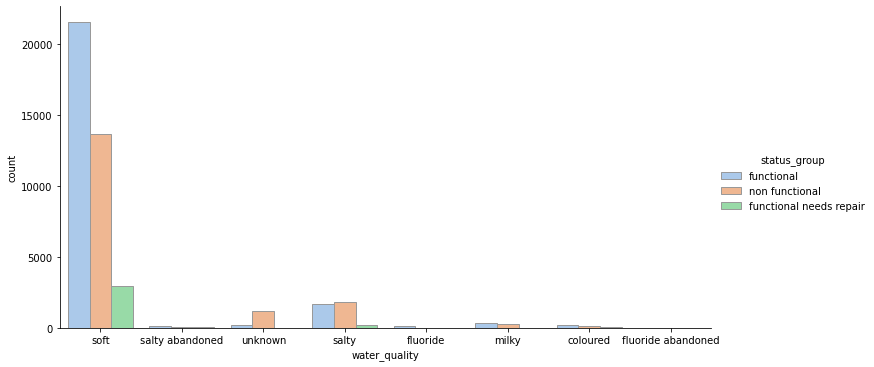

In [15]:
#visualizating water quality on the basis of status group
sns.catplot(x="water_quality", hue="status_group", kind="count",palette="pastel", edgecolor=".6",data=df_train,aspect=2)

From the plot we can infer that, if the water quality is soft, then there is a high probability that it is in the functional condition

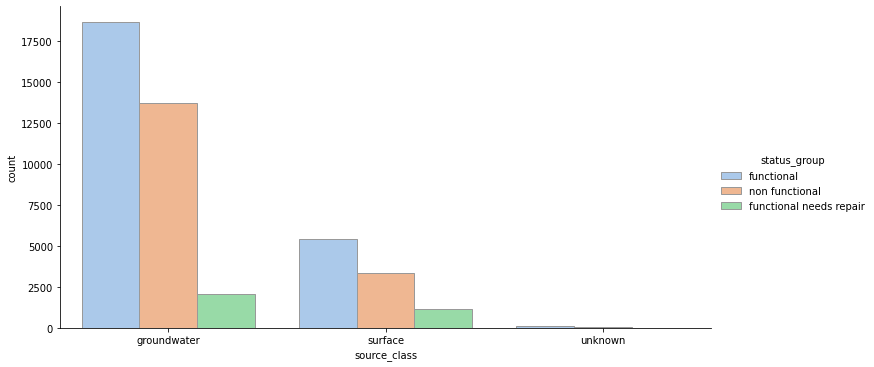

In [16]:
#visualizating source_class on the basis of status group
sns.catplot(x="source_class", hue="status_group", kind="count",palette="pastel", edgecolor=".6",data=df_train,aspect=2)

From the plot we can infer that, if the source_class is ground water, then there is a high probability that it is in the functional condition

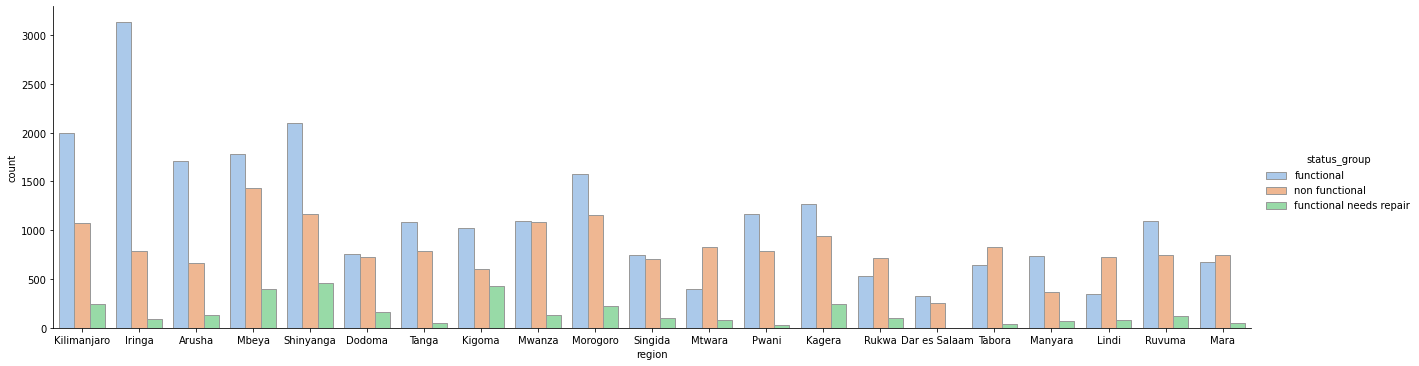

In [18]:
#visualizating region on the basis of status group
sns.catplot(x="region", hue="status_group", kind="count",palette="pastel", edgecolor=".6",data=df_train,aspect=3.5)

From the plot we can see that, there are some regions where there is a high probability that pump is in the functional condition.

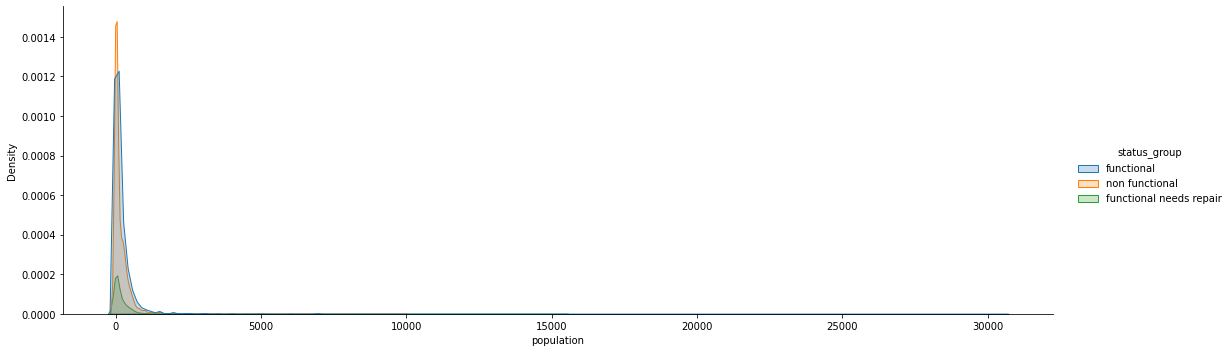

In [32]:
#visualizating population on the basis of status group
sns.displot(df_train, x="population", hue="status_group", kind="kde",aspect=3,fill=True)

With population, functional group increases.

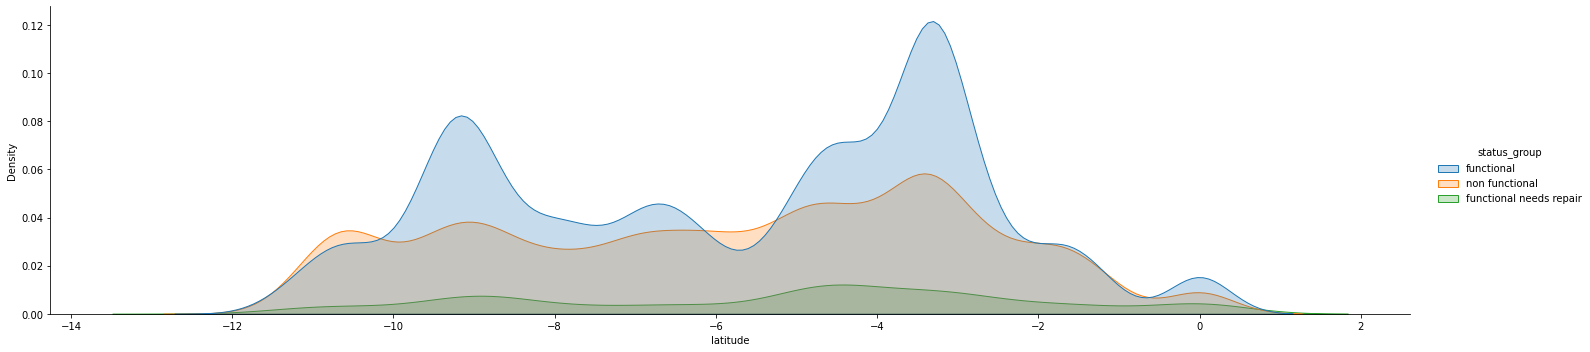

In [26]:
#visualizating latitude on the basis of status group
sns.displot(df_train, x="latitude", hue="status_group", kind="kde",aspect=4,fill=True)

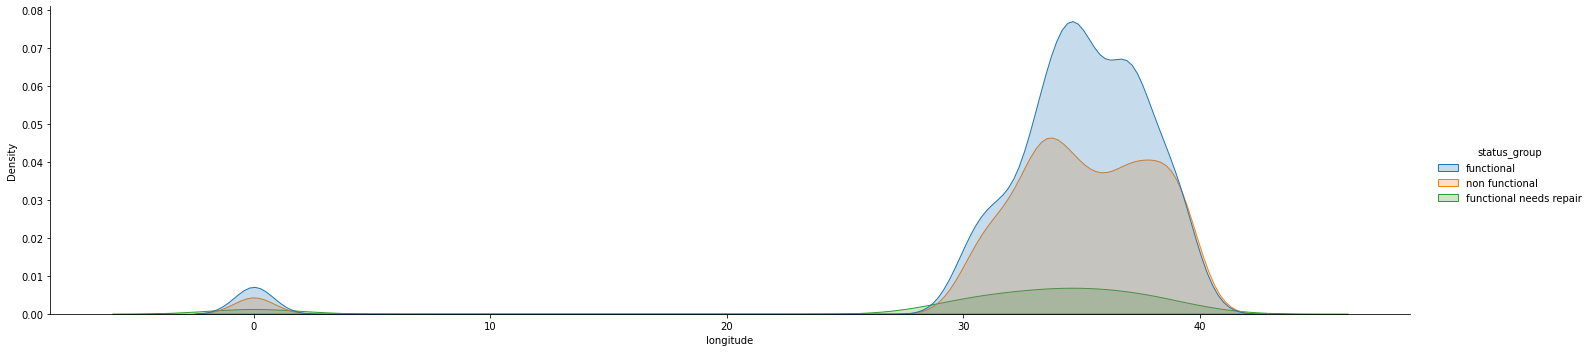

In [28]:
#visualizating longitute on the basis of status group
sns.displot(df_train, x="longitude", hue="status_group", kind="kde",aspect=4,fill=True)

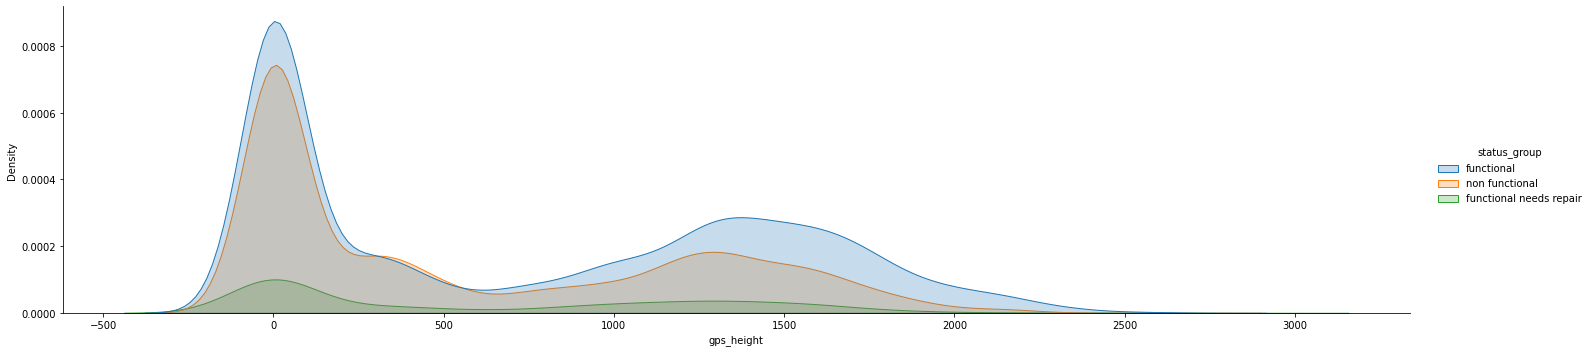

In [30]:
#visualizating gps_height on the basis of status group
sns.displot(df_train, x="gps_height", hue="status_group", kind="kde",aspect=4,fill=True)

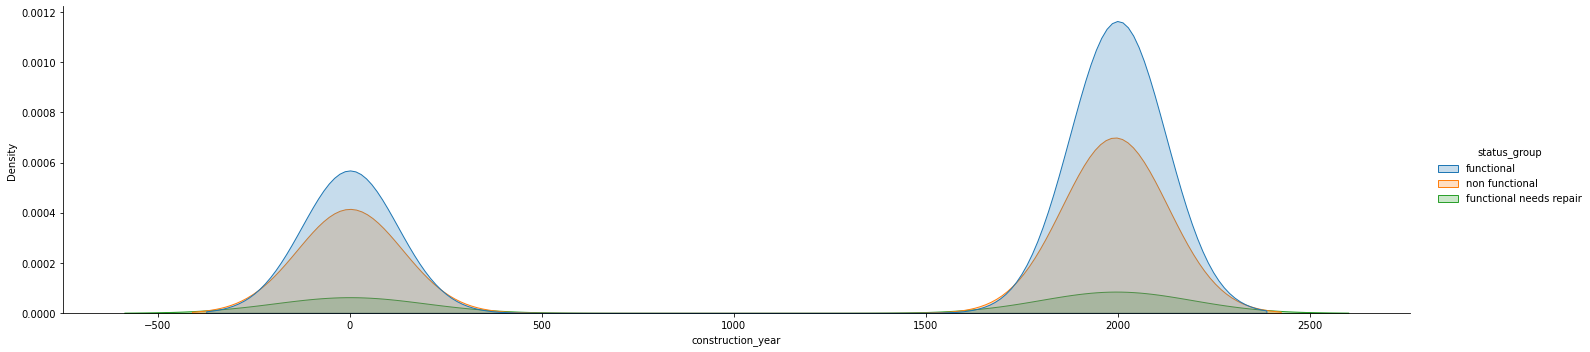

In [31]:
#visualizating construction_year on the basis of status group
sns.displot(df_train, x="construction_year", hue="status_group", kind="kde",aspect=4,fill=True)

# Feature engineering-1

In [4]:
#Adding a new feature "AGE of the pump"
df_train['construction_year']=df_train['construction_year'].replace({0:1993})
df_train['age']=pd.DatetimeIndex(df_train['date_recorded']).year.astype(int)-df_train['construction_year']


In [251]:
#finding similar features column
df_train.groupby(['source','source_type','source_class']).size()


source                source_type           source_class
dam                   dam                   surface           489
hand dtw              borehole              groundwater       652
lake                  river/lake            surface           544
machine dbh           borehole              groundwater      8282
other                 other                 unknown           156
rainwater harvesting  rainwater harvesting  surface          1739
river                 river/lake            surface          7135
shallow well          shallow well          groundwater     12618
spring                spring                groundwater     12889
unknown               other                 unknown            46
dtype: int64

In [239]:
#finding similar features column
df_train.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1339
cemo                       other motorpump        motorpump                   70
climax                     other motorpump        motorpump                   26
gravity                    gravity                gravity                  20127
india mark ii              india mark ii          handpump                  1768
india mark iii             india mark iii         handpump                    77
ksb                        submersible            submersible               1043
mono                       mono                   motorpump                 2164
nira/tanira                nira/tanira            handpump                  6130
other                      other                  other                     4768
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

In [240]:
#finding similar features column
df_train.groupby(['payment','payment_type']).size()

payment                payment_type
never pay              never pay       19002
other                  other             796
pay annually           annually         2717
pay monthly            monthly          6182
pay per bucket         per bucket       6808
pay when scheme fails  on failure       2941
unknown                unknown          6104
dtype: int64

In [241]:
#finding similar features column
df_train.groupby(['quantity','quantity_group']).size()

quantity      quantity_group
dry           dry                4725
enough        enough            24821
insufficient  insufficient      11367
seasonal      seasonal           3049
unknown       unknown             588
dtype: int64

In [242]:
#finding similar features column
df_train.groupby(['waterpoint_type','waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough               90
communal standpipe           communal standpipe       21452
communal standpipe multiple  communal standpipe        4558
dam                          dam                          5
hand pump                    hand pump                13116
improved spring              improved spring            590
other                        other                     4739
dtype: int64

There is a similarity between features, so we can keep one feature and drop rest of the features as dropping similar features would not affect our model.        

In [5]:
#dropping id and data_recorded column
df_train=df_train.drop(['id','date_recorded'],1)


In [6]:
#dropping similar features
df_train=df_train.drop(['source_type','source','extraction_type_group','extraction_type_class','payment_type','quantity_group','waterpoint_type_group'],1)


In [7]:
#dropping public meeting, permit features,ward etc. would not effect our model much
df_train=df_train.drop(['public_meeting','permit','ward','subvillage','recorded_by','district_code','num_private','wpt_name','scheme_name','construction_year','management_group'],1)

In [8]:
print(df_train.shape)


(44550, 22)


In [9]:
#handling missing values of training set
total_null_values=df_train.isnull().sum().sort_values(ascending=False)
percent_null_values=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
totaldf_train=pd.concat([total_null_values,percent_null_values],1,keys=['total_null_values','percent_null_values'])
totaldf_train

,total_null_values,percent_null_values
scheme_management,2832,0.063569
installer,2807,0.063008
funder,2793,0.062694
age,0,0.000000
lga,0,0.000000
gps_height,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
basin,0,0.000000
region,0,0.000000


In [10]:
#filling null_values with mode as data_type of the columns having null_values is categorical
for column in ['scheme_management', 'installer', 'funder']:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)


In [11]:
#handling low frequency levels in 'funder' and 'installer'
#converting those that occur 80 times or less and set to 'other'
low_freq=['funder','installer']
df_train = df_train.apply(lambda x: x.mask(x.map(x.value_counts())<80, 'other') if x.name in low_freq else x)



In [12]:
#encoding categorical variable
column=['installer','funder','basin','region','lga','scheme_management','extraction_type','management','payment','water_quality','quality_group','quantity','source_class','waterpoint_type']
for col in column:
    df_train[col]=pd.factorize(df_train[col])[0]
for col in column:
    df_test[col]=pd.factorize(df_test[col])[0]  


In [13]:
#max and min values of each feature columns in training set
for col in df_train.columns.values: 
    unique_entries = pd.unique(df_train[col])
    print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}")
 

The column 'amount_tsh' has range 0.0 to 170000.0
The column 'funder' has range 0 to 84
The column 'gps_height' has range -90 to 2770
The column 'installer' has range 0 to 78
The column 'longitude' has range 0.0 to 40.34519307
The column 'latitude' has range -11.64837759 to -2e-08
The column 'basin' has range 0 to 8
The column 'region' has range 0 to 20
The column 'region_code' has range 1 to 99
The column 'lga' has range 0 to 124
The column 'population' has range 0 to 30500
The column 'scheme_management' has range 0 to 11
The column 'extraction_type' has range 0 to 17
The column 'management' has range 0 to 11
The column 'payment' has range 0 to 6
The column 'water_quality' has range 0 to 7
The column 'quality_group' has range 0 to 5
The column 'quantity' has range 0 to 4
The column 'source_class' has range 0 to 2
The column 'waterpoint_type' has range 0 to 6
The column 'status_group' has range functional to non functional
The column 'age' has range -7 to 53


In [14]:
df_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,lga,...,extraction_type,management,payment,water_quality,quality_group,quantity,source_class,waterpoint_type,status_group,age
0,7.0,0,1203,0,37.228664,-3.256505,0,0,3,0,...,0,0,0,0,0,0,0,0,functional,5
1,0.0,1,1409,1,34.615481,-9.972601,1,1,11,1,...,0,1,1,0,0,0,0,0,functional,27
2,0.0,2,1572,2,36.658778,-3.321529,0,2,2,2,...,0,2,1,0,0,1,0,0,non functional,11
3,0.0,3,0,3,33.628025,-8.860795,2,3,12,3,...,0,3,2,0,0,1,1,0,functional,18
4,300.0,3,1283,3,37.655509,-3.669777,0,0,3,4,...,0,2,3,0,0,1,0,0,functional,6


# Spliting the training set

In [15]:
x_train=df_train.drop(['status_group'],1)
y_train=df_train['status_group']

In [16]:
#encoding dependent feature
print(y_train.value_counts())
#mapping each unquie value of dependent feature to numeric value
y_train=y_train.map({'functional':1,'non functional':2,'functional needs repair':3})
print(y_train.value_counts())

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64
1    24194
2    17118
3     3238
Name: status_group, dtype: int64


We can see the dataset is imbalanced. So to avoid overtraining model on 1 feature over another feature, we will balance our dataset before trainng.

#### Handling imbalanced Dataset

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_train,y_train=ros.fit_resample(x_train,y_train)

In [18]:
print(y_train.value_counts())

3    24194
2    24194
1    24194
Name: status_group, dtype: int64


# Hyperparameter tuning and model building

In [19]:
#further spliting the training set into train and test set for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

### Hyperparameter tuning for RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier_rand= RandomForestClassifier(random_state=0)
classifier_rand.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
n_estimators=[10,15,20,30]
max_features=['auto', 'log2']
max_depth=[10,20,30]
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
hyperparameter={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search = GridSearchCV(estimator=classifier_rand,param_grid=hyperparameter,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.33 %
Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 30}


In [28]:
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_rand=RandomForestClassifier(max_depth=30, max_features='auto', n_estimators= 30)
classifier_rand.fit(X_train,y_train)
score=cross_val_score(classifier_rand,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_rand.score(X_test,y_test)*100)

CV_score: 88.33493518717799
Test_Accurarcy: 89.6395899922848


#### Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

In [29]:

from sklearn.feature_selection import RFECV
selector=RFECV(classifier_rand,min_features_to_select=1)
selector=selector.fit(X_train,y_train)
print(selector.n_features_)
print(selector.ranking_)

20
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


In [30]:
rank=selector.ranking_
dict1=dict(enumerate(X_train.columns))
for i in range(len(rank)):
    if rank[i]==1:
        print("Important feature : {}".format(dict1[i]))
for i in range(len(rank)):
    if rank[i]!=1:        
        print("Redundant Feature : {}".format(dict1[i]))
        
        

Important feature : amount_tsh
Important feature : funder
Important feature : gps_height
Important feature : installer
Important feature : longitude
Important feature : latitude
Important feature : basin
Important feature : region
Important feature : region_code
Important feature : lga
Important feature : population
Important feature : scheme_management
Important feature : extraction_type
Important feature : management
Important feature : payment
Important feature : quality_group
Important feature : quantity
Important feature : source_class
Important feature : waterpoint_type
Important feature : age
Redundant Feature : water_quality


##### Redundant features can be eliminated in the second round of feature selection as they have low importance or ranking

### Hyperparameter tuning for XGBoostClassifier

In [31]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
gamma=[0.02, 0.05]
n_estimators=[10,15,20]
max_depth=[6,8,10]
params = {'gamma':gamma,'n_estimators':n_estimators,'max_depth':max_depth}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_xg,param_grid=params,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy: 81.93 %
Best Parameters: {'gamma': 0.02, 'max_depth': 10, 'n_estimators': 20}


In [33]:
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_xg=XGBClassifier(max_depth=10,gamma=0.02 , n_estimators= 20)
classifier_xg.fit(X_train,y_train)
score=cross_val_score(classifier_xg,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_xg.score(X_test,y_test)*100)

[12:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV_score: 81.92924533618245
Test_Accurarcy: 83.4508982695911


### Hyperparameter tuning for ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
classifier_extra=ExtraTreesClassifier(random_state=49)
classifier_extra.fit(X_train,y_train)

ExtraTreesClassifier(random_state=49)

In [35]:
n_estimators=[10,15,20,30]
max_depth = [10, 20, 30]
criterion= ['entropy','gini']
hyperparameter={'n_estimators':n_estimators,'max_depth':max_depth,'criterion':criterion}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_extra,param_grid=hyperparameter,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 88.54 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 30}


In [36]:
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_extra=ExtraTreesClassifier(max_depth=30,criterion='gini',n_estimators= 30)
classifier_extra.fit(X_train,y_train)
score=cross_val_score(classifier_extra,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_extra.score(X_test,y_test)*100)

CV_score: 88.52047707101616
Test_Accurarcy: 90.03637165215474


# Feature engineering-2

In [209]:
#For better accuracy:-
# 1) We will eliminate the redundant features on the basis of recursive feature elimination and cross-validation ranking.
# 2)We have further replaced latitute and longitute column by x, y and z coordinates for the better represented of the location.
# 3)Standardized amount_tsh,gps_height and population columns just to avoid overtraining of the model on one feature over another.

In [37]:
#Elimination redundant features
df_train=df_train.drop(['water_quality'],1)

In [38]:
#Lat,long coordinates have a problem that they are 2 features that represent a three dimensional space.
#Mapping lat,long coordinates into x , y and z coordinates.
df_train['x_cord']=np.cos(df_train["longitude"].astype(np.float64))*np.cos(df_train["latitude"].astype(np.float64))
df_train['y_cord']=np.sin(df_train["longitude"].astype(np.float64))*np.cos(df_train["latitude"].astype(np.float64))
df_train['z_cord']=np.sin(df_train["latitude"].astype(np.float64))


In [39]:
#dropping latitude and longitute column
df_train=df_train.drop(['longitude','latitude'],1)

In [40]:
#standardizing 'amount_tsh','gps_height'and 'population' columns in training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_col=['amount_tsh','gps_height','population']
features = df_train[std_col]
scaler= sc.fit_transform(features.values)
df_train[std_col] = scaler

In [41]:
df_train.head()

,amount_tsh,funder,gps_height,installer,basin,region,region_code,lga,population,scheme_management,...,payment,quality_group,quantity,source_class,waterpoint_type,status_group,age,x_cord,y_cord,z_cord
0,-0.125118,0,0.774905,0,0,0,3,0,-0.186043,0,...,0,0,0,0,0,functional,5,-0.885487,0.450296,0.114659
1,-0.128031,1,1.071887,1,1,1,11,1,-0.227797,1,...,1,0,0,0,0,functional,27,0.852227,0.049452,0.520830
2,-0.128031,2,1.306877,2,0,2,2,2,-0.060779,2,...,1,0,1,0,0,non functional,11,-0.497764,0.848647,0.178967
3,-0.128031,3,-0.959411,3,2,3,12,3,-0.373938,2,...,2,0,1,1,0,functional,18,0.505592,-0.677220,-0.534556
4,-0.003173,3,0.890238,3,0,0,3,4,-0.302956,2,...,3,0,1,0,0,functional,6,-0.862903,0.037649,0.503966


In [42]:
df_train.shape

(44550, 22)

In [43]:
#max and min values of each feature columns in training set
for col in df_train.columns.values: 
    unique_entries = pd.unique(df_train[col])
    print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}")

The column 'amount_tsh' has range -0.12803146356712033 to 70.62523771540873
The column 'funder' has range 0 to 84
The column 'gps_height' has range -1.08915993803498 to 3.0339842859424797
The column 'installer' has range 0 to 78
The column 'basin' has range 0 to 8
The column 'region' has range 0 to 20
The column 'region_code' has range 1 to 99
The column 'lga' has range 0 to 124
The column 'population' has range -0.3739381808870536 to 63.30167695495039
The column 'scheme_management' has range 0 to 11
The column 'extraction_type' has range 0 to 17
The column 'management' has range 0 to 11
The column 'payment' has range 0 to 6
The column 'quality_group' has range 0 to 5
The column 'quantity' has range 0 to 4
The column 'source_class' has range 0 to 2
The column 'waterpoint_type' has range 0 to 6
The column 'status_group' has range functional to non functional
The column 'age' has range -7 to 53
The column 'x_cord' has range -0.999815609347757 to 0.9999999999999998
The column 'y_cord' has

# Spliting the training set

In [44]:
x_train=df_train.drop(['status_group'],1)
y_train=df_train['status_group']

In [45]:
#encoding dependent feature
print(y_train.value_counts())
#mapping each unquie value of dependent feature to numeric value
y_train=y_train.map({'functional':1,'non functional':2,'functional needs repair':3})
print(y_train.value_counts())

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64
1    24194
2    17118
3     3238
Name: status_group, dtype: int64


We can see the dataset is imbalanced. So to avoid overtraining model on 1 feature over another feature, we will balance our dataset before trainng.

#### Handling imbalanced Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_train,y_train=ros.fit_resample(x_train,y_train)

In [47]:
print(y_train.value_counts())

3    24194
2    24194
1    24194
Name: status_group, dtype: int64


## Hyperparameter tuning and model building

In [48]:
#further spliting the training set into train and test set for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

### Hyperparameter tuning for XgBoostClassifier

In [49]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
gamma=[0.02, 0.05]
n_estimators=[10,15,20,30]
max_depth=[6,8,10]
params = {'gamma':gamma,'n_estimators':n_estimators,'max_depth':max_depth}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_xg,param_grid=params,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy: 84.10 %
Best Parameters: {'gamma': 0.05, 'max_depth': 10, 'n_estimators': 30}


In [51]:
#cross validation using Test set
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_xg=XGBClassifier(max_depth=10,gamma=0.02 , n_estimators= 30)
classifier_xg.fit(X_train,y_train)
score=cross_val_score(classifier_xg,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_xg.score(X_test,y_test)*100)

[12:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV_score: 84.0050818956636
Test_Accurarcy: 85.57257797861789


### Hyperparameter tuning for RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier_rand= RandomForestClassifier(random_state=0)
classifier_rand.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
n_estimators=[10,15,20,30]
max_features=['auto', 'log2']
max_depth=[10,20,30]
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
hyperparameter={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search = GridSearchCV(estimator=classifier_rand,param_grid=hyperparameter,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.25 %
Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 30}


In [54]:
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_rand=RandomForestClassifier(max_depth=30, max_features='auto', n_estimators= 30)
classifier_rand.fit(X_train,y_train)
score=cross_val_score(classifier_rand,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_rand.score(X_test,y_test)*100)

CV_score: 88.17511964299347
Test_Accurarcy: 89.7057202689298


### Hyperparameter tuning for ExtraTreesClassifier

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
classifier_extra=ExtraTreesClassifier(random_state=49)
classifier_extra.fit(X_train,y_train)

ExtraTreesClassifier(random_state=49)

In [56]:
n_estimators=[10,15,20,30]
max_depth = [10, 20, 30]
criterion= ['entropy','gini']
hyperparameter={'n_estimators':n_estimators,'max_depth':max_depth,'criterion':criterion}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_extra,param_grid=hyperparameter,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.59 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 30}


In [57]:
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_extra=ExtraTreesClassifier(max_depth=30,criterion='gini',n_estimators= 30)
classifier_extra.fit(X_train,y_train)
score=cross_val_score(classifier_extra,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_extra.score(X_test,y_test)*100)

CV_score: 88.59028695488969
Test_Accurarcy: 89.89860024247768


## Visualization using T-sne

In [346]:
y_train=y_train.map({1:'functional',2:'non functional',3:'functional needs repair'})

In [76]:
from sklearn.manifold import TSNE

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


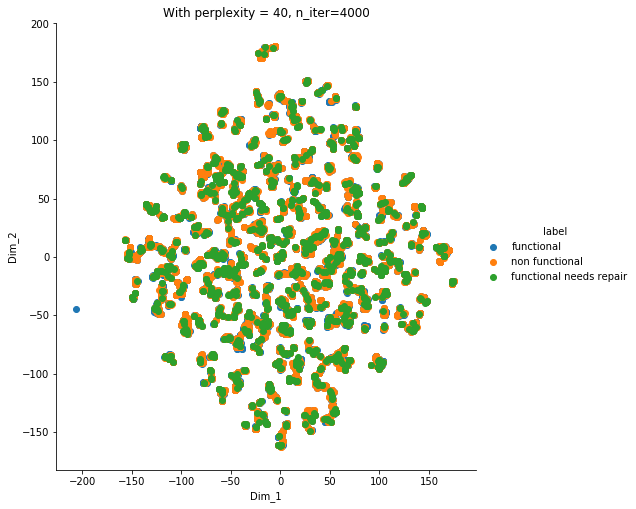

In [354]:
model = TSNE(n_components=2, random_state=0, perplexity=40,  n_iter=4000)
tsne_data = model.fit_transform(x_train[:20000])
# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train[:20000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=7).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40, n_iter=4000')
plt.show()

## Feature engineering on Test data  

In [58]:
#Adding a new feature "AGE of the pump"
df_test['construction_year']=df_test['construction_year'].replace({0:1993})
df_test['age']=pd.DatetimeIndex(df_test['date_recorded']).year.astype(int)-df_test['construction_year']

In [59]:
#dropping id and data_recorded column
df_test=df_test.drop(['id','date_recorded','Unnamed: 0'],1)

In [60]:
#dropping public meeting, permit features,ward etc. would not effect our model much
df_test=df_test.drop(['source_type','source','extraction_type_group','extraction_type_class','payment_type','quantity_group','waterpoint_type_group'],1)

In [61]:
#dropping public meeting, permit features,ward etc. would not effect our model much
df_test=df_test.drop(['public_meeting','permit','ward','subvillage','recorded_by','district_code','num_private','wpt_name','scheme_name','construction_year','management_group'],1)

In [62]:
#handling missing values of test set
total_null_values=df_test.isnull().sum().sort_values(ascending=False)
percent_null_values=(df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
totaldf_test=pd.concat([total_null_values,percent_null_values],1,keys=['total_null_values','percent_null_values'])
totaldf_test

,total_null_values,percent_null_values
age,0,0.0
lga,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
basin,0,0.0
region,0,0.0
region_code,0,0.0


In [63]:
#filling null_values with mode as data_type of the columns having null_values is categorical
for column in ['scheme_management', 'installer', 'funder']:
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)

In [64]:
#handling low frequency levels in 'funder' and 'installer'
#converting those that occur 80 times or less and set to 'other'
low_freq=['funder','installer']
df_test = df_test.apply(lambda x: x.mask(x.map(x.value_counts())<80, 'other') if x.name in low_freq else x)

In [65]:
#encoding categorical variable
column=['installer','funder','basin','region','lga','scheme_management','extraction_type','management','payment','water_quality','quality_group','quantity','source_class','waterpoint_type']
for col in column:
    df_test[col]=pd.factorize(df_test[col])[0]  

In [66]:
#Elimination redundant features
df_test=df_test.drop(['water_quality'],1)

In [67]:
#Lat,long coordinates have a problem that they are 2 features that represent a three dimensional space.
#Mapping lat,long coordinates into x , y and z coordinates.
df_test['x_cord']=np.cos(df_test["longitude"].astype(np.float64))*np.cos(df_test["latitude"].astype(np.float64))
df_test['y_cord']=np.sin(df_test["longitude"].astype(np.float64))*np.cos(df_test["latitude"].astype(np.float64))
df_test['z_cord']=np.sin(df_test["latitude"].astype(np.float64))

In [68]:
#dropping latitude and longitute column
df_test=df_test.drop(['longitude','latitude'],1)

In [69]:
#standardizing 'amount_tsh','gps_height'and 'population' columns in test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_col=['amount_tsh','gps_height','population']
features = df_test[std_col]
scaler= sc.fit_transform(features.values)
df_test[std_col] = scaler

In [70]:
#max and min values of each feature columns in test set 
for col in df_test.columns.values: 
    unique_entries = pd.unique(df_test[col])
    print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}")   

The column 'amount_tsh' has range -0.08058319676048512 to 81.02822988318516
The column 'funder' has range 0 to 31
The column 'gps_height' has range -1.0698280723958797 to 2.8018298328777003
The column 'installer' has range 0 to 23
The column 'basin' has range 0 to 8
The column 'region' has range 0 to 20
The column 'region_code' has range 1 to 99
The column 'lga' has range 0 to 123
The column 'population' has range -0.4067611579933158 to 21.905767732589283
The column 'scheme_management' has range 0 to 11
The column 'extraction_type' has range 0 to 16
The column 'management' has range 0 to 11
The column 'payment' has range 0 to 6
The column 'quality_group' has range 0 to 5
The column 'quantity' has range 0 to 4
The column 'source_class' has range 0 to 2
The column 'waterpoint_type' has range 0 to 6
The column 'age' has range -5 to 53
The column 'x_cord' has range -0.9993762187149792 to 0.9999999999999998
The column 'y_cord' has range -0.9997229516192775 to 0.9822582909639378
The column '

In [71]:
df_test.shape

(14850, 21)

In [72]:
df_test.head()

,amount_tsh,funder,gps_height,installer,basin,region,region_code,lga,population,scheme_management,...,management,payment,quality_group,quantity,source_class,waterpoint_type,age,x_cord,y_cord,z_cord
0,-0.080583,0,1.445231,0,0,0,11,0,1.309072,0,...,0,0,0,0,0,0,7,0.197759,0.163141,-0.966580
1,-0.080583,0,-0.978713,1,1,1,1,1,-0.406761,0,...,0,0,0,1,0,0,18,0.017021,-0.484441,0.874659
2,-0.080583,1,-0.978713,2,0,1,1,2,-0.406761,0,...,0,0,0,1,0,1,18,0.122979,-0.513598,-0.849172
3,-0.080583,0,-0.978713,0,2,2,18,3,-0.406761,0,...,0,0,0,1,0,1,18,-0.559807,-0.045099,-0.827395
4,-0.080583,2,-0.978713,0,2,2,18,4,-0.406761,0,...,0,0,0,2,1,0,18,0.291332,0.132899,-0.947345


### Comments:-
1)Out of the above three models, we have selected ExtraTreesClassifier as it is giving highest Test accuracy of 89.89% .

2)Now, we will do final prediction on Test.csv data,using ExtraTreesclassifier. 

### Prediction on Test data

In [73]:
df_test1=df_test.copy()

In [74]:
test_data=classifier_xg.predict(df_test1)
test_data=pd.DataFrame(test_data,columns=['status_group'])
test_data['status_group']=test_data['status_group'].map({1:'functional',2:'non functional',3:'functional needs repair'})
test_data.to_csv('203110049_assignment2.csv',header=False,index=False)

References:-
    1)scikit-learn tutorials and user guide https://scikit-learn.org/ 
    2)https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
    3)https://www.kaggle.com/rafay12/pca-vs-tsne
    4)https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
    5)https://machinelearningmastery.com/ for feature engineering
    6)https://medium.com/ for feature engineering